In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
np.linalg.norm(np.array([1,2,4]))

np.float64(4.58257569495584)

In [10]:
np.dot(np.identity(3),a)

array([1., 2., 4.])

In [75]:
p = np.array([0,0,10**(-30)])

In [76]:
graph = np.zeros((500,500))

/var/folders/mk/2r6tg7fn01342s61sqx10ydr0000gn/T/ipykernel_46266/1062970302.py:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(graph.T))


Text(0, 0.5, 'z')

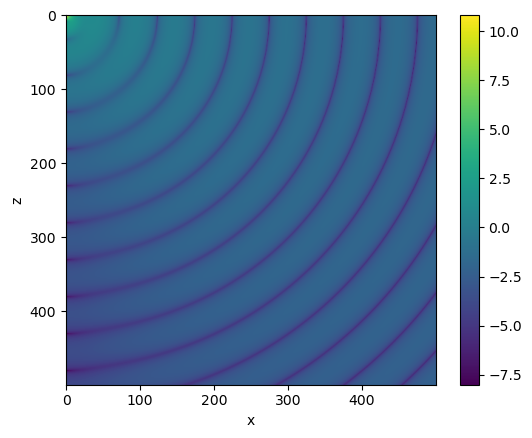

In [191]:
plt.imshow(np.log(graph.T))
plt.colorbar()
plt.xlabel("x")
plt.ylabel("z")

In [94]:
M = 20
div = 10
# distance between each simulation point
d = 300*10**(-9)
lamba = 689*10**(-9)
k_dir = np.array([0,0])
k0 = 2*np.pi/lamba
E0 = 1
positiony = np.arange(-M,M+1) * d
positionz = np.arange(-M,M+1) * d
Y,Z = np.meshgrid(positiony,positionz)

In [411]:
SLMphase = np.zeros([2*M+1,2*M+1])
# SLMphase = np.random.random([2*M+1,2*M+1])*np.pi*2

In [278]:
for i in range(2*M+1):
    if i % 2 == 0:
        SLMphase[i] = 3.14

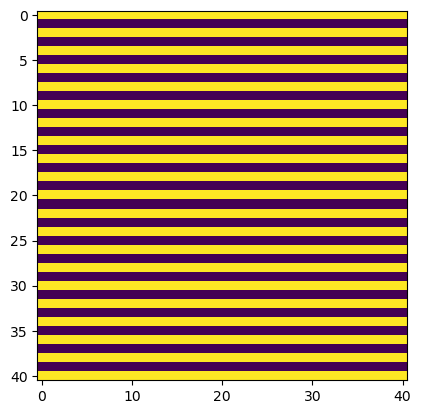

In [265]:
plt.imshow(SLMphase)

In [412]:
# initial surface for diffraction and interference
init = np.zeros([2*M+1,2*M+1],complex)
for i in range(2*M+1):
    for j in range(2*M+1):
        t = (k0*k_dir[0] * d * i + k0*k_dir[1] * d * j)
        init[i,j] = E0 * np.e**((0+1j)*t)

In [280]:
observation = 10**(-3)

In [413]:
sim_y = 100
sim_z = 100
sim_dy = 2000*10**(-9)
sim_dz = 2000*10**(-9)
deltay = 0
deltaz = 0

gridy = np.arange(-sim_y,sim_y+1)
gridz = np.arange(-sim_z,sim_z+1)
y = gridy * sim_dy + deltay
z = gridz * sim_dz + deltaz
result3 = np.zeros([sim_y*2+1,sim_y*2+1],complex)

In [414]:
for i in range(sim_y*2+1):
    if i % 10 == 0:
        print(i)
    for j in range(sim_y*2+1):
        r = ((Y-y[i])**2 + (Z-z[j])**2 + observation**2)**0.5
        phase = (k0*r + SLMphase) * (0+1j)
        decayfactor = (observation/r)
        result3[i,j] = np.sum(decayfactor * init * np.e**phase)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200


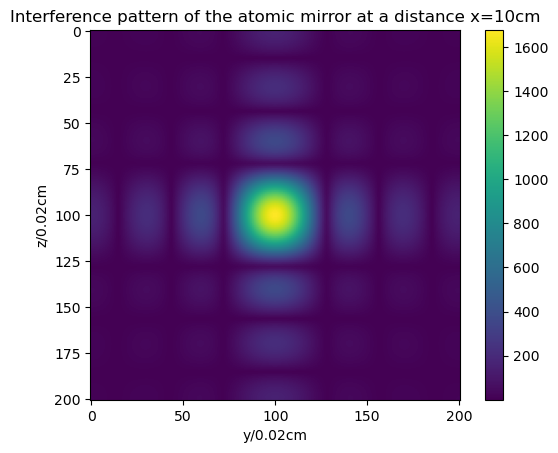

In [521]:
plt.imshow(np.abs(result3))
plt.colorbar()
plt.xlabel("y/0.02cm")
plt.ylabel("z/0.02cm")
plt.title("Interference pattern of a same SLM")
plt.savefig("SLMinterference.png",dpi=500)

In [1]:
"improve this code to support dyadic green function"

'improve this code to support dyadic green function'

In [189]:
def dyadic_tensor_calc_single(x,y,z,k,p):
    r = np.sqrt(x**2+y**2+z**2)
    a = np.e**((0+1j)*k*r)*k**2/(4*np.pi*8.854*10**(-12)*r)
    scalarcoeff = 1 + (0+1j)/(k*r) - 1/(k*r)**2
    tensorcoeff = -1 - 3/(k*r) + 3/(k*r)**2
    vec = np.asarray([x,y,z])/r
    tensor = (np.outer(vec,vec)*tensorcoeff + np.identity(3)*scalarcoeff) * a
    return np.dot(tensor,p)

In [451]:
p = np.array([0.e+00, 0.e+00, 1e-30])

In [450]:
dyadic_tensor_calc_single(lamba*0.5,0,0,k0,p)

array([  0.        +0.j        ,   0.        +0.j        ,
       -15.59829669-5.52487936j])

In [89]:
"near field green function plotting"

'near field green function plotting'

/var/folders/mk/2r6tg7fn01342s61sqx10ydr0000gn/T/ipykernel_46266/3734640691.py:9: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(graph.T))


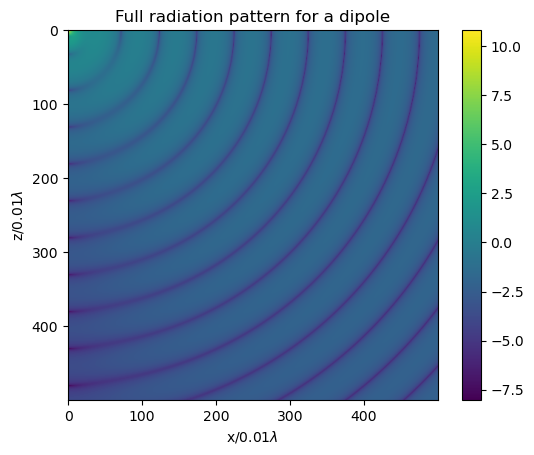

In [453]:
for i in range(500):
    for j in range(500):
        if i == 0 and j == 0:
            graph[i,j] = 0
            continue
        x = (i) * lamba/100
        z = (j) * lamba/100
        graph[i,j] = np.linalg.norm(np.real(dyadic_tensor_calc_single(x,0,z,k0,p)))
plt.imshow(np.log(graph.T))
plt.colorbar()
plt.xlabel("x/0.01$\lambda$")
plt.ylabel("z/0.01$\lambda$")
plt.title("Full radiation pattern for a dipole")
plt.savefig("Full_radiation.png",dpi=500)

In [316]:
"you can see that the green function looks a bit atypical in the very near location with d <~ lambda. We can actually further test it"

'you can see that the green function looks a bit atypical in the very near location with d <~ lambda. We can actually further test it'

In [267]:
result1 = np.zeros(9999)

In [465]:
for i in range(9999):
    result1[i] = -np.real(dyadic_tensor_calc_single((i+1)*0.01*lamba,0,0,k0,p))[2]

'for a z-direction oscillating dipole, we consider the Ez at different x direction. We have normalized the decay factor'

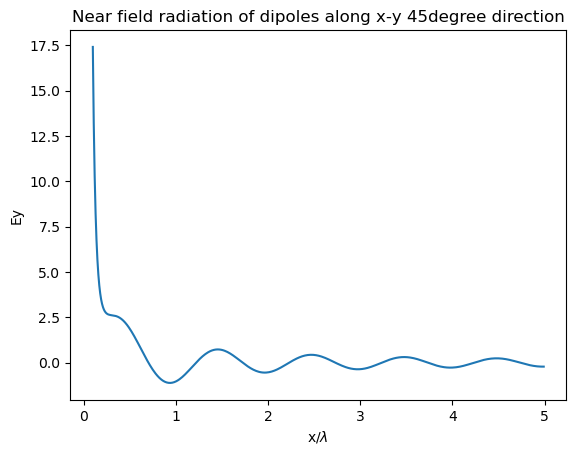

In [466]:
plt.plot(np.arange(10,500)/100,result1[10:500])
plt.title("Near field radiation of dipoles along x-y 45degree direction")
plt.xlabel("x/$\lambda$")
plt.ylabel("Ey")
plt.savefig("1Dnearfield.png",dpi=500)
"for a z-direction oscillating dipole, we consider the Ez at different x direction. We have normalized the decay factor"

In [311]:
"you can see that the green function looks a bit atypical in the very near location with d <~ lambda"

'you can see that the green function looks a bit atypical in the very near location with d <~ lambda'

In [515]:
sim_y = 100
sim_z = 100
sim_dy = 200000*10**(-9)
sim_dz = 200000*10**(-9)
deltay = 0
deltaz = 0

gridy = np.arange(-sim_y,sim_y+1)
gridz = np.arange(-sim_z,sim_z+1)
y = gridy * sim_dy + deltay
z = gridz * sim_dz + deltaz
resultprobe = np.zeros([sim_y*2+1,sim_z*2+1],complex)
observation = 0.1

In [710]:
# define the position of atoms: from number -M to M, each of them has a distance of d. 
# The wavelenegth of each atom is lamba
M = 20
# distance between each simulation point
d = 300*10**(-9)
lamba = 689*10**(-9)
k_dir = np.array([0,0])
k0 = 2*np.pi/lamba
E0 = 1
positiony = np.arange(-M,M+1) * d
positionz = np.arange(-M,M+1) * d
Y,Z = np.meshgrid(positiony,positionz)
X = np.zeros((2*M+1,2*M+1))
# different atom has different polarization
P = np.zeros((3,2*M+1,2*M+1))
for i in range(2*M+1):
    for j in range(2*M+1):
        P[:,i,j] = [0,0,10**(-30)]

Bigidentity = np.zeros((3,3,2*M+1,2*M+1))
for i in range(2*M+1):
    for j in range(2*M+1):
        Bigidentity[:,:,i,j] = np.identity(3)

In [354]:
# vectorized dyadic tensor calculation function(to calculate the effect of all the atoms at the same time)
def dyadic_tensor_calc(x,y,z,k,p):
    r = np.sqrt(x**2+y**2+z**2)
    a = np.e**((0+1j)*k*r)*k**2/(4*np.pi*8.854*10**(-12)*r)
    scalarcoeff = 1 + (0+1j)/(k*r) - 1/(k*r)**2
    tensorcoeff = -1 - 3/(k*r) + 3/(k*r)**2
    vec = np.asarray([x,y,z])/r
    # print(vec.shape)
    outerproduct = np.einsum('ixy,jxy->ijxy',vec,vec)
    # outerproduct = np.array([[vec[0]*vec[0],vec[0]*vec[1],vec[0]*vec[2]],[vec[1]*vec[0],vec[1]*vec[1],vec[1]*vec[2]],[vec[2]*vec[0],vec[2]*vec[1],vec[2]*vec[2]]])
    tensor = (outerproduct*tensorcoeff + Bigidentity*scalarcoeff) * a
    # output the total E field(by summing over the contribution of all particles)
    return np.einsum('ijxy,jxy->ixy', tensor,p).sum(1).sum(1)

In [709]:
def atom_mirror_radiation(x,y,z,P1):
    distanceX = x-X
    distanceY = y-Y
    distanceZ = z-Z
    return dyadic_tensor_calc(distanceX,distanceY,distanceZ,k0,P1)

In [502]:
result = np.zeros((9999,20))

In [534]:
for j in np.arange(1,10000):
    result[j-1,2] = np.linalg.norm(atom_mirror_radiation(j*lamba*0.01,0,0))

In [536]:
result[0,2]

np.float64(4.6030103229722075)

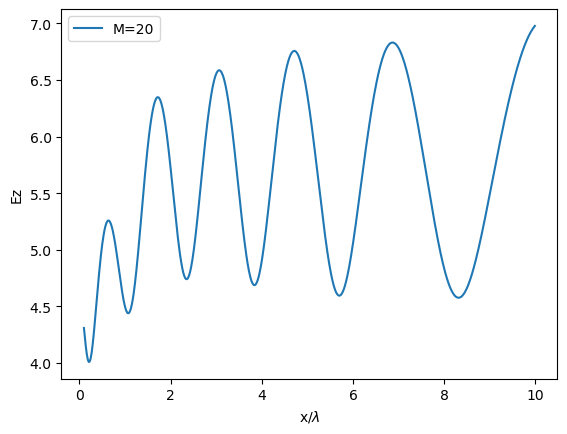

In [535]:
# plt.plot(np.arange(10,1000)/100,result[10:1000,0],label="M=5")
# plt.plot(np.arange(10,1000)/100,result[10:1000,1],label="M=10")
plt.plot(np.arange(10,1000)/100,result[10:1000,2],label="M=20")
plt.legend()
plt.xlabel("x/$\lambda$")
plt.ylabel("Ez")
plt.savefig("ArrayStandard_10.png",dpi=500)
# plt.plot(result[10:1000,3])
# plt.plot(result[10:300,4])
# plt.plot(result[1:1000,5])

In [516]:
for i in range(sim_y*2+1):
    if i % 10 == 0:
        print(i)
    for j in range(sim_z*2+1):
        resultprobe[i,j] = np.linalg.norm(atom_mirror_radiation(observation,y[i],z[j],P))

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200


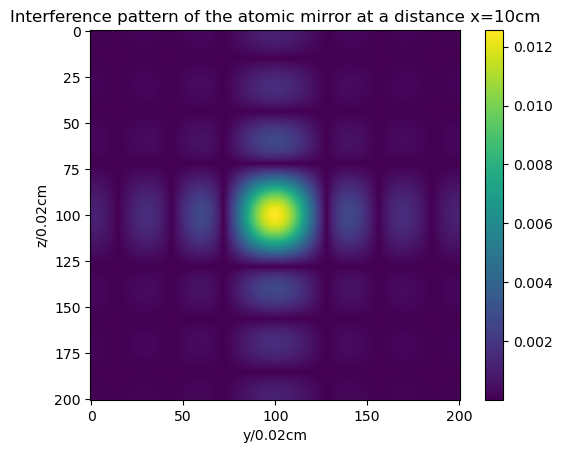

In [519]:
plt.imshow(np.abs(resultprobe))
plt.colorbar()
plt.xlabel("y/0.02cm")
plt.ylabel("z/0.02cm")
plt.title("Interference pattern of the atomic mirror at a distance x=10cm")
plt.savefig("simSLMinterference.png",dpi=500)


In [ ]:
"The propagation part of the code is finished. Now it's time to solve how the dipoles oscillates with the existence of atomic interaction"

In [ ]:
"we assume some physical value"

In [ ]:
deg = 5.29*10**(-11)
e = 1.6*10**(-19)

In [437]:
GTransfer = np.zeros((2*M+1,2*M+1,2*M+1,2*M+1))

In [438]:
detuning = np.zeros((2*M+1,2*M+1))
alpha0 = 

In [435]:
for i in range(2*M+1):
    for j in range(2*M+1):
        

20

In [526]:
(1.6*10**(-19)*5*10**(-11))**2/(1.05*10**(-34)*10**9)

6.095238095238096e-34

In [533]:
P[:,20,20] = [0,0,0]

In [538]:
6.095238095238096e-4 * 4.6

0.002803809523809524

In [550]:
# define the position of atoms: from number -M to M, each of them has a distance of d. 
# The wavelenegth of each atom is lamba
M = 20
# distance between each simulation point

lamba = 689*10**(-9)
k_dir = np.array([0,0])
k0 = 2*np.pi/lamba
E0 = 1
# different atom has different polarization
P = np.zeros((3,2*M+1,2*M+1))
X = np.zeros((2*M+1,2*M+1))
for i in range(2*M+1):
    for j in range(2*M+1):
        P[:,i,j] = [0,0,10**(-30)]
P[:,M,M] = [0,0,0]

Bigidentity = np.zeros((3,3,2*M+1,2*M+1))
for i in range(2*M+1):
    for j in range(2*M+1):
        Bigidentity[:,:,i,j] = np.identity(3)
result5 = np.zeros(400)

oi = 0
for d in np.arange(100,500)*10**(-9):
    positiony = np.arange(-M,M+1) * d
    positionz = np.arange(-M,M+1) * d
    Y,Z = np.meshgrid(positiony,positionz)
    result5[oi] = np.linalg.norm(atom_mirror_radiation(0.001*lamba,0,0))
    oi = oi + 1
    
    


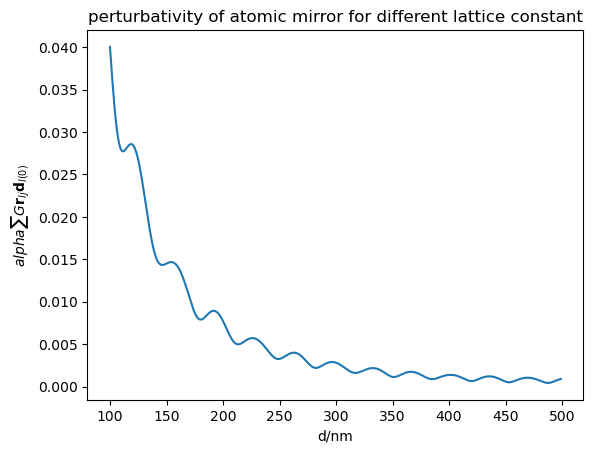

In [567]:
plt.plot(np.arange(100,500),result5*6.095238095238096e-4)
plt.xlabel("d/nm")
plt.ylabel("$alpha \sum G\mathbf{r}_{l j} \mathbf{d}_{l(0)}$")
plt.title("perturbativity of atomic mirror for different lattice constant")
plt.savefig("perturbativity.png",dpi=500)

In [576]:
TransitionStrength.size

25431849

In [699]:
px = np.array([1,0,0])
py = np.array([0,1,0])
pz = np.array([0,0,1])

In [893]:
detuning = np.zeros((2*M+1,2*M+1))
alpha0 = 6.095238095238096e-33
decaywidth = 10**6

In [986]:
TransitionStrength = np.zeros((3,2*M+1,2*M+1,3,2*M+1,2*M+1),dtype=complex)
for i in range(2*M+1):
    print(i)
    for j in range(2*M+1):
        # iterating all atoms
        for k in range(2*M+1):
            for l in range(2*M+1):
                if k == i and l == j:
                    TransitionStrength[:,i,j,:,k,l] = np.identity(3) * (alpha0 * decaywidth/(decaywidth+detuning[i,j]))**(-1)
                    continue
                TransitionStrength[:,i,j,:,k,l] = 0.1*np.array([dyadic_tensor_calc_single(0,(i-k)*d,(j-l)*d,k0,px),dyadic_tensor_calc_single(0,(i-k)*d,(j-l)*d,k0,py),dyadic_tensor_calc_single(0,(i-k)*d,(j-l)*d,k0,pz)])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


In [653]:
np.einsum("ijklmn,lmn->ijk",TransitionStrength,dpol0)

In [987]:
TransitionStrength_flatten = TransitionStrength.reshape(3*41*41,3*41*41)
Etotal_flatten = Etotal.reshape(3*41*41)
solution = np.linalg.solve(TransitionStrength_flatten, Etotal_flatten)

In [988]:
d_final = solution.reshape((3,41,41))

In [945]:
d_final[1].shape

(41, 41)

Text(0.5, 1.0, 'polarization on y axis with weak interaction')

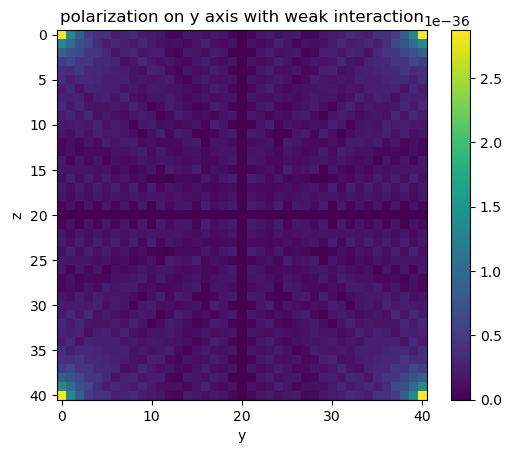

In [989]:
plt.imshow(np.abs(d_final[1]))
plt.colorbar()
plt.xlabel("y")
plt.ylabel("z")
plt.title("polarization on y axis with weak interaction")
# plt.savefig("polarization_y_weak.png",dpi=500)

Text(0.5, 1.0, 'polarization on y axis with strong interaction')

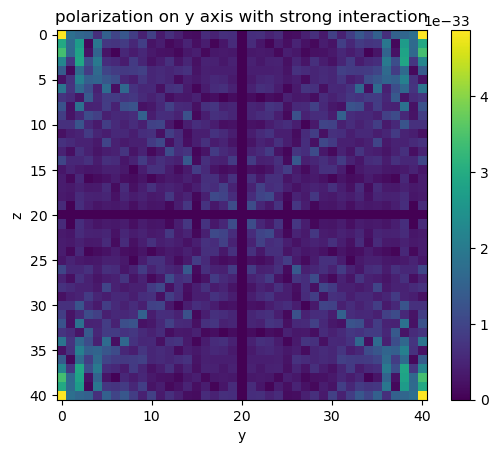

In [962]:
plt.imshow(np.abs(d_final[1]))
plt.colorbar()
plt.xlabel("y")
plt.ylabel("z")
plt.title("polarization on y axis with strong interaction")


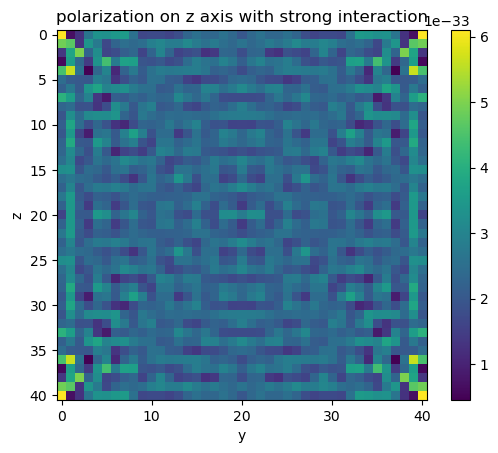

In [961]:
plt.imshow(np.abs(d_final[2]))
plt.colorbar()
plt.xlabel("y")
plt.ylabel("z")
plt.title("polarization on z axis with strong interaction")
plt.savefig("polarization_z_strong.png",dpi=500)

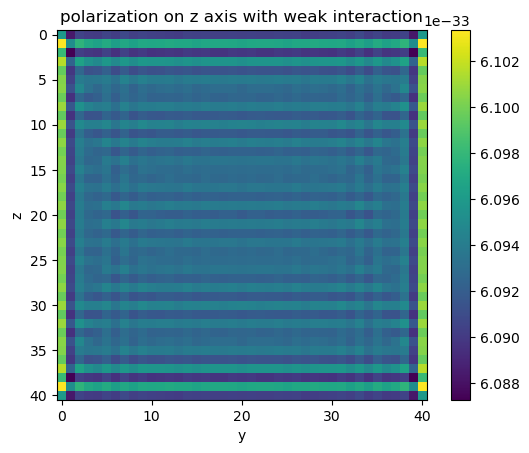

In [956]:
plt.imshow(np.abs(d_final[2]))
plt.colorbar()
plt.xlabel("y")
plt.ylabel("z")
plt.title("polarization on z axis with weak interaction")
plt.savefig("polarization_z_weak.png",dpi=500)

In [938]:
solution.reshape((3,41,41))[2]

array([[6.09591128e-33+6.41024244e-36j, 6.08826372e-33+1.36193453e-35j,
        6.09048195e-33+1.03131083e-35j, ...,
        6.09048195e-33+1.03131083e-35j, 6.08826372e-33+1.36193453e-35j,
        6.09591128e-33+6.41024244e-36j],
       [6.10334643e-33+7.65073642e-36j, 6.09512428e-33+1.69378126e-35j,
        6.09769113e-33+1.28624846e-35j, ...,
        6.09769113e-33+1.28624846e-35j, 6.09512428e-33+1.69378126e-35j,
        6.10334643e-33+7.65073642e-36j],
       [6.09812356e-33+9.98175655e-36j, 6.08724213e-33+1.89593995e-35j,
        6.09026386e-33+1.38113347e-35j, ...,
        6.09026386e-33+1.38113347e-35j, 6.08724213e-33+1.89593995e-35j,
        6.09812356e-33+9.98175655e-36j],
       ...,
       [6.09812356e-33+9.98175655e-36j, 6.08724213e-33+1.89593995e-35j,
        6.09026386e-33+1.38113347e-35j, ...,
        6.09026386e-33+1.38113347e-35j, 6.08724213e-33+1.89593995e-35j,
        6.09812356e-33+9.98175655e-36j],
       [6.10334643e-33+7.65073642e-36j, 6.09512428e-33+1.69378126e-3

In [911]:
TransitionStrength[:,1,1,:,5,2]

array([[2.44670043e+28-6.19793314e+29j, 0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j],
       [0.00000000e+00+0.00000000e+00j, 6.52439584e+28+1.57147617e+29j,
        0.00000000e+00+0.00000000e+00j],
       [0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
        2.44670043e+28-6.19793314e+29j]])

In [844]:
Etotal

array([[[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        ...,
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]],

       [[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        ...,
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]],

       [[1.+0.j, 1.+0.j, 1.+0.j, ..., 1.+0.j, 1.+0.j, 1.+0.j],
        [1.+0.j, 1.+0.j, 1.+0.j, ..., 1.+0.j, 1.+0.j, 1.+0.j],
        [1.+0.j, 1.+0.j, 1.+0.j, ..., 1.+0.j, 1.+0.j, 1.+0.j],
        ...,
        [1.+

In [803]:
polarization = np.zeros((2*M+1,2*M+1),dtype=complex)

In [804]:
polarization = (alpha0*decaywidth/(decaywidth+detuning))

In [832]:
Etotal = np.array([np.zeros((2*M+1,2*M+1),dtype=complex),np.zeros((2*M+1,2*M+1),dtype=complex),np.ones((2*M+1,2*M+1),dtype=complex)])

In [811]:
dpol0 = Etotal * polarization

In [812]:
for i in range(100):
    dpol0 = (np.einsum("ijklmn,lmn->ijk",TransitionStrength,dpol0) + Etotal)*polarization

In [867]:
d_final.shape

(41, 41)

In [866]:
dpol0.shape

(3, 41, 41)

In [990]:
resultprobe1 = np.zeros((sim_y*2+1,sim_z*2+1,3))

In [991]:
for i in range(sim_y*2+1):
    if i % 10 == 0:
        print(i)
    for j in range(sim_z*2+1):
        resultprobe1[i,j] = np.abs(atom_mirror_radiation(observation,y[i],z[j],d_final))

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200


In [1019]:
resultprobe1[:,:,:].sum()

np.float64(0.180547086721938)

In [1020]:
resultprobe[:,:,:].sum()

np.float64(0.07066451735594129)

In [1018]:
d_final[2]

array([[6.09591128e-33+6.41024244e-36j, 6.08826372e-33+1.36193453e-35j,
        6.09048195e-33+1.03131083e-35j, ...,
        6.09048195e-33+1.03131083e-35j, 6.08826372e-33+1.36193453e-35j,
        6.09591128e-33+6.41024244e-36j],
       [6.10334643e-33+7.65073642e-36j, 6.09512428e-33+1.69378126e-35j,
        6.09769113e-33+1.28624846e-35j, ...,
        6.09769113e-33+1.28624846e-35j, 6.09512428e-33+1.69378126e-35j,
        6.10334643e-33+7.65073642e-36j],
       [6.09812356e-33+9.98175655e-36j, 6.08724213e-33+1.89593995e-35j,
        6.09026386e-33+1.38113347e-35j, ...,
        6.09026386e-33+1.38113347e-35j, 6.08724213e-33+1.89593995e-35j,
        6.09812356e-33+9.98175655e-36j],
       ...,
       [6.09812356e-33+9.98175655e-36j, 6.08724213e-33+1.89593995e-35j,
        6.09026386e-33+1.38113347e-35j, ...,
        6.09026386e-33+1.38113347e-35j, 6.08724213e-33+1.89593995e-35j,
        6.09812356e-33+9.98175655e-36j],
       [6.10334643e-33+7.65073642e-36j, 6.09512428e-33+1.69378126e-3

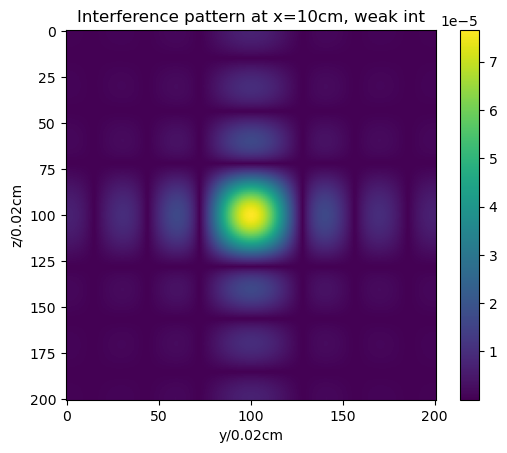

In [1031]:
plt.imshow(np.sqrt(resultprobe1[:,:,0]**2+resultprobe1[:,:,1]**2+resultprobe1[:,:,2]**2))
plt.colorbar()
plt.xlabel("y/0.02cm")
plt.ylabel("z/0.02cm")
plt.title("Interference pattern at x=10cm, weak int")
plt.savefig("weak_int_pattern.png",dpi=500)


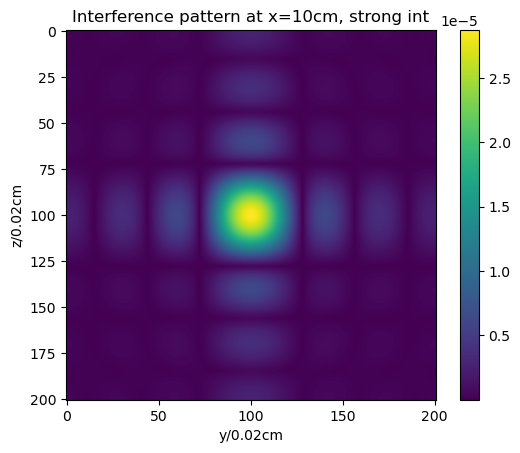

In [1032]:
plt.imshow(np.sqrt(resultprobe[:,:,0]**2+resultprobe[:,:,1]**2+resultprobe[:,:,2]**2))
plt.colorbar()
plt.xlabel("y/0.02cm")
plt.ylabel("z/0.02cm")
plt.title("Interference pattern at x=10cm, strong int")
plt.savefig("strong_int_pattern.png",dpi=500)

In [1026]:
(resultprobe[:,:,0]**2+resultprobe[:,:,1]**2+resultprobe[:,:,2]**2).shape

(201, 201)

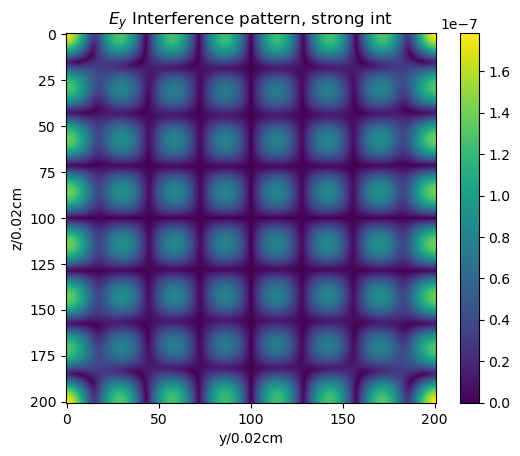

In [1040]:
plt.imshow(np.abs(resultprobe[:,:,1]))
plt.colorbar()
plt.xlabel("y/0.02cm")
plt.ylabel("z/0.02cm")
plt.title("$E_y$ Interference pattern, strong int")
plt.savefig("E_y_inter_strong.png",dpi=500)

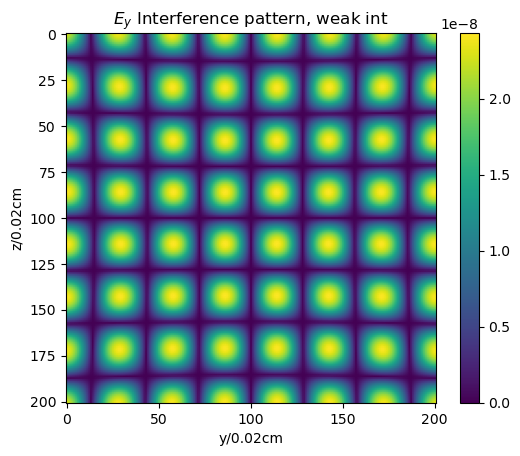

In [1039]:
plt.imshow(np.abs(resultprobe1[:,:,1]))
plt.colorbar()
plt.xlabel("y/0.02cm")
plt.ylabel("z/0.02cm")
plt.title("$E_y$ Interference pattern, weak int")
plt.savefig("E_y_inter_weak.png",dpi=500)

Text(0.5, 1.0, '$E_y$ Interference pattern, strong int')

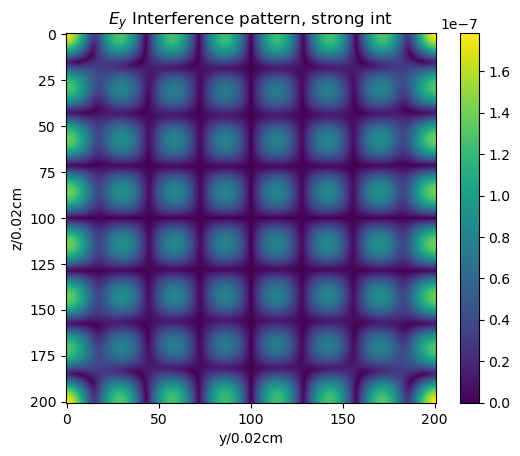

In [1038]:
plt.imshow(np.abs(resultprobe[:,:,1]))
plt.colorbar()
plt.xlabel("y/0.02cm")
plt.ylabel("z/0.02cm")
plt.title("$E_y$ Interference pattern, strong int")

Text(0.5, 1.0, 'Interference pattern of the atomic mirror at a distance x=10cm')

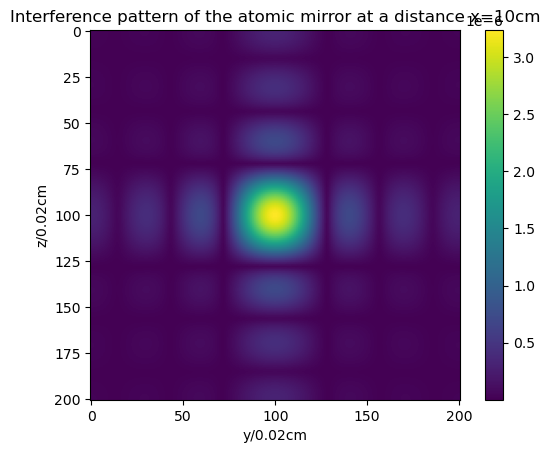

In [930]:
plt.imshow(np.abs(resultprobe))
plt.colorbar()
plt.xlabel("y/0.02cm")
plt.ylabel("z/0.02cm")
plt.title("Interference pattern of the atomic mirror at a distance x=10cm")

Text(0.5, 1.0, 'Interference pattern of the atomic mirror at a distance x=10cm')

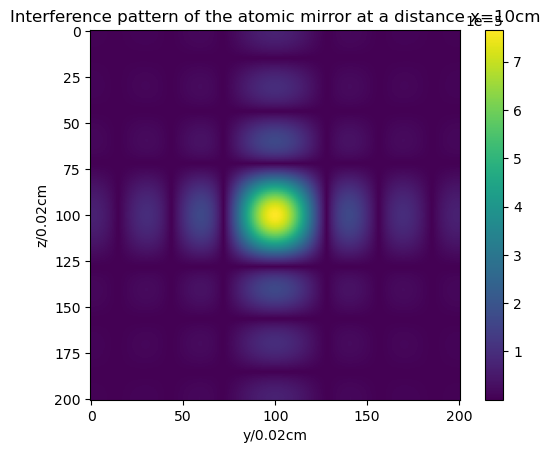

In [941]:
plt.imshow(np.abs(resultprobe))
plt.colorbar()
plt.xlabel("y/0.02cm")
plt.ylabel("z/0.02cm")
plt.title("Interference pattern of the atomic mirror at a distance x=10cm")

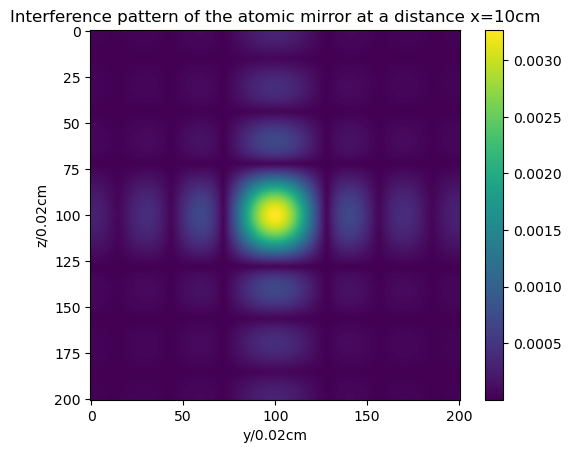

In [892]:
plt.imshow(np.abs(resultprobe))
plt.colorbar()
plt.xlabel("y/0.02cm")
plt.ylabel("z/0.02cm")
plt.title("Interference pattern of the atomic mirror at a distance x=10cm")
plt.savefig("atomic_mirror_stronginteraction.png",dpi=500)

In [942]:
resultprobe.shape

(201, 201)

In [932]:
np.abs(resultprobe).sum()

np.float64(0.007485574003393695)

In [940]:
resultprobe.sum()

np.complex128(0.1723281701634578+0j)

In [898]:
resultprobe.sum()

np.complex128(4.640023613393212e+63+0j)

In [781]:
resultprobe.sum()

np.complex128(0.1723858205937288+0j)

In [784]:
resultprobe.sum()

np.complex128(0.1729142931289662+0j)

In [791]:
resultprobe.sum()

np.complex128(0.17369576663097472+0j)

In [702]:
np.einsum("ijklmn,lmn->ijk",TransitionStrength,dpol0)

array([[[ 0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j],
        [ 0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j],
        [ 0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j],
        ...,
        [ 0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j

In [691]:
dpol1[2]

array([[6.0952381e-34-1.31754754e-67j, 6.0952381e-34+1.95673486e-67j,
        6.0952381e-34+1.48198202e-67j, ...,
        6.0952381e-34+1.48198202e-67j, 6.0952381e-34+1.95673486e-67j,
        6.0952381e-34-1.31754754e-67j],
       [6.0952381e-34-6.45653002e-67j, 6.0952381e-34-2.40356104e-67j,
        6.0952381e-34-3.01055768e-67j, ...,
        6.0952381e-34-3.01055768e-67j, 6.0952381e-34-2.40356104e-67j,
        6.0952381e-34-6.45653002e-67j],
       [6.0952381e-34-7.54275565e-67j, 6.0952381e-34-5.05151867e-67j,
        6.0952381e-34-5.43817573e-67j, ...,
        6.0952381e-34-5.43817573e-67j, 6.0952381e-34-5.05151867e-67j,
        6.0952381e-34-7.54275565e-67j],
       ...,
       [6.0952381e-34-7.54275565e-67j, 6.0952381e-34-5.05151867e-67j,
        6.0952381e-34-5.43817573e-67j, ...,
        6.0952381e-34-5.43817573e-67j, 6.0952381e-34-5.05151867e-67j,
        6.0952381e-34-7.54275565e-67j],
       [6.0952381e-34-6.45653002e-67j, 6.0952381e-34-2.40356104e-67j,
        6.0952381e-34-

In [ ]:
np.einsum("ijk,ijklmn")

In [598]:
Arraytest = np.array([[1,2],[3,4]])
btest = np.array([1,3])

In [608]:
np.einsum("ijklmn,lmn->ijk",TransitionStrength,P)[:,0,0]

array([ 0.00000000e+00+0.00000000e+00j, -4.09684406e-01+9.37427105e-02j,
        3.80903446e-31-3.56735791e-31j])

In [595]:
Arraytest

array([[1, 2],
       [3, 4]])

In [596]:
btest

array([1, 0])

In [607]:
P[:,1,1]

array([0.e+00, 0.e+00, 1.e-30])

In [632]:
P1 = np.zeros((3,2*M+1,2*M+1))

In [633]:
P1[:,0,0] = pz

In [634]:
asdf = np.einsum("ijklmn,lmn->ijk",TransitionStrength,P1)

In [643]:
asdf[:,1,0]

array([0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
       9.51200028e-32-1.45993929e-30j])

In [645]:
TransitionStrength[:,0,0,:,1,0]

array([[0.09512   -1.45993929j, 0.        +0.j        ,
        0.        +0.j        ],
       [0.        +0.j        , 0.46068908+0.77875144j,
        0.        +0.j        ],
       [0.        +0.j        , 0.        +0.j        ,
        0.09512   -1.45993929j]])

In [623]:
dyadic_tensor_calc_single(d,0*d,0*d,k0,px)

array([4.60689079e+29+7.78751443e+29j, 0.00000000e+00+0.00000000e+00j,
       0.00000000e+00+0.00000000e+00j])

In [624]:
d

np.float64(4.99e-07)

In [630]:
px

array([1.e-30, 0.e+00, 0.e+00])

In [652]:
dyadic_tensor_calc_single(0,100*d,0,k0,pz)

array([ 0.       +0.j        ,  0.       +0.j        ,
       -0.0133096+0.00687111j])